# **Heart Disease Prediction(Classification)**

In [2]:
#Importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Set plot style
sns.set_style('whitegrid')

# **Loading the Data**

#Dataset link: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

In [3]:
# Download the dataset using the Kaggle Hub API
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

Using Colab cache for faster access to the 'heart-disease-data' dataset.


In [4]:
# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# **Exploratory Data Analysis**

In [5]:
df.shape

(920, 16)

In [6]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## **Missing Values**

In [9]:
df.isnull().sum().sort_values(ascending=False)

,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
exang,55
thalch,55
chol,30
restecg,2


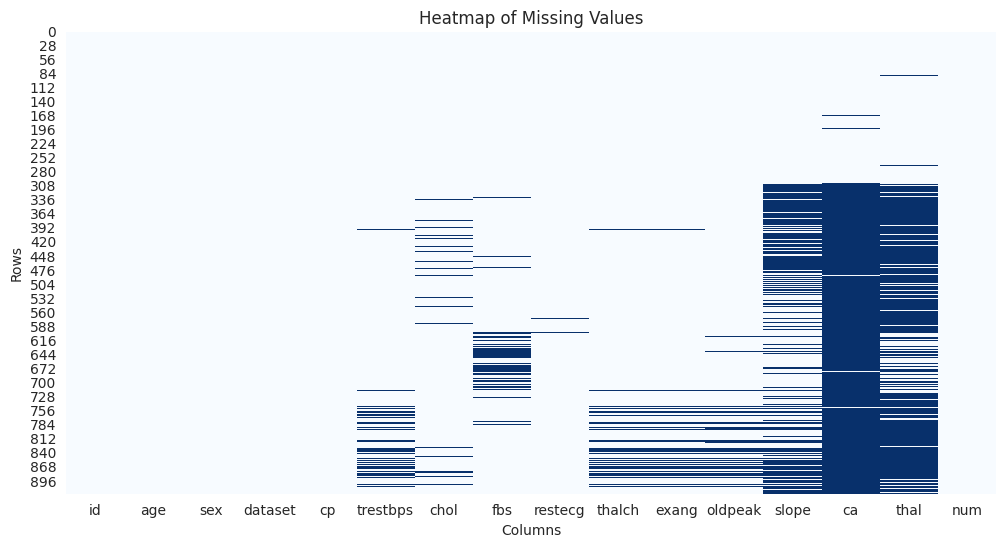

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Blues')
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

### **Insights**
*  There are many null values in our dataset, predominantly in ca, thal, slope, oldpeak, fbs etc.

## **Univariate Analysis**

## **Numerical Data**

### **Outlier Detection**

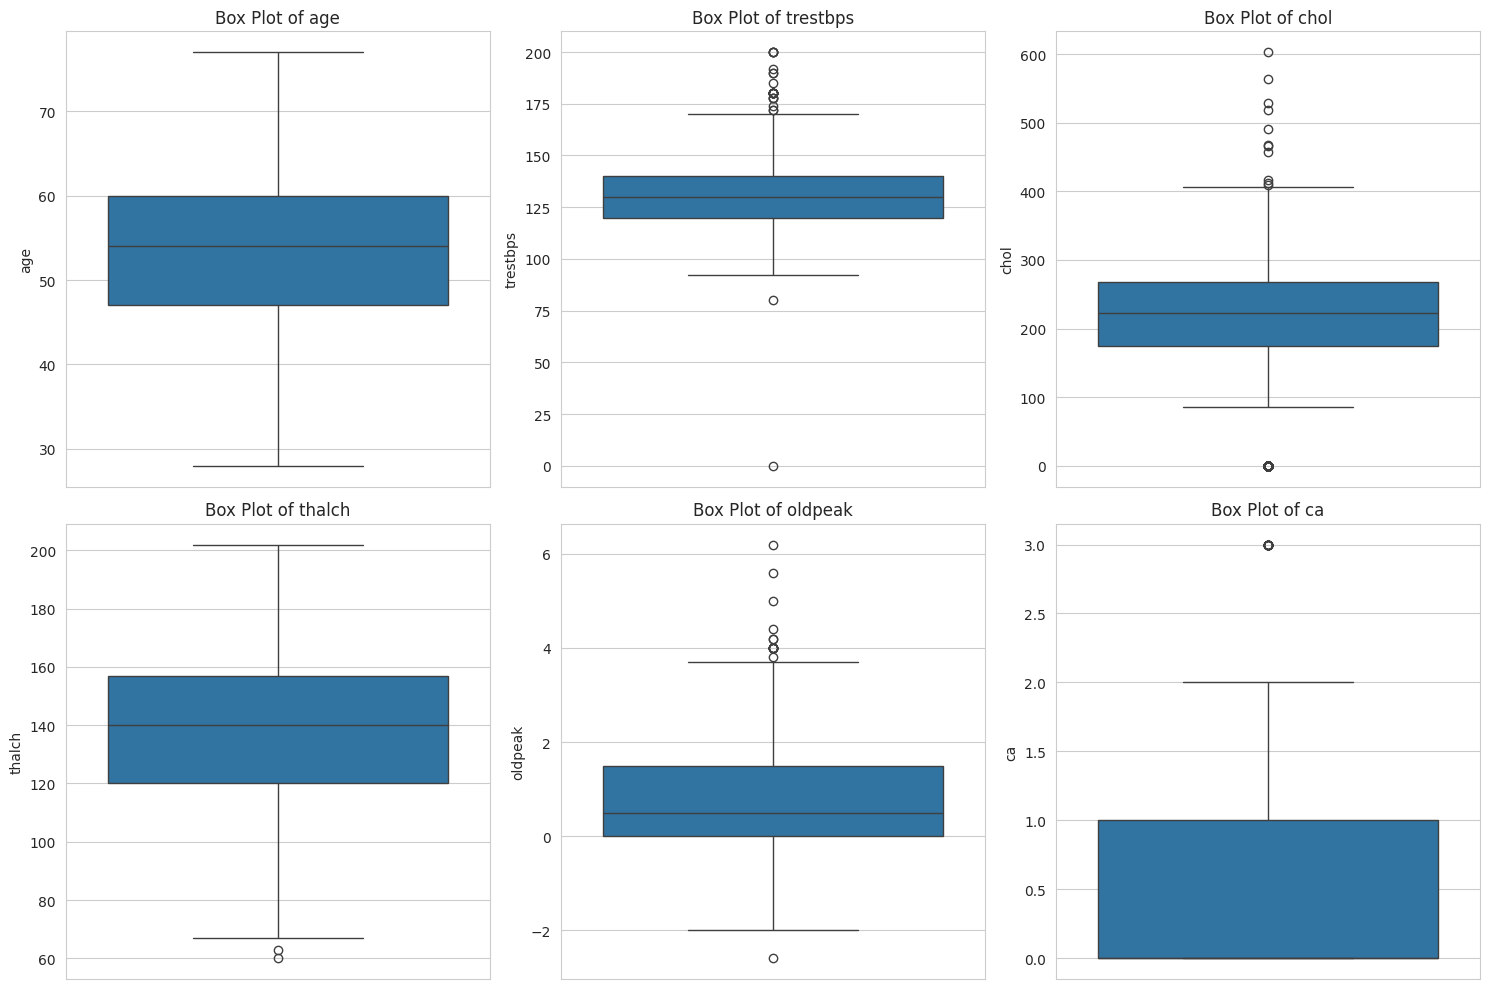

In [11]:
# Select numerical columns for outlier detection
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### **Insights**
* 'trestbps', 'chol', 'thalch', 'oldpeak', and 'ca' all show some potential outliers, indicated by points outside the whiskers of the box plots.
* 'age' appears to have a relatively symmetrical distribution with no obvious outliers based on the box plot.

### **Distribution Plots**


Histograms of Numerical Features:


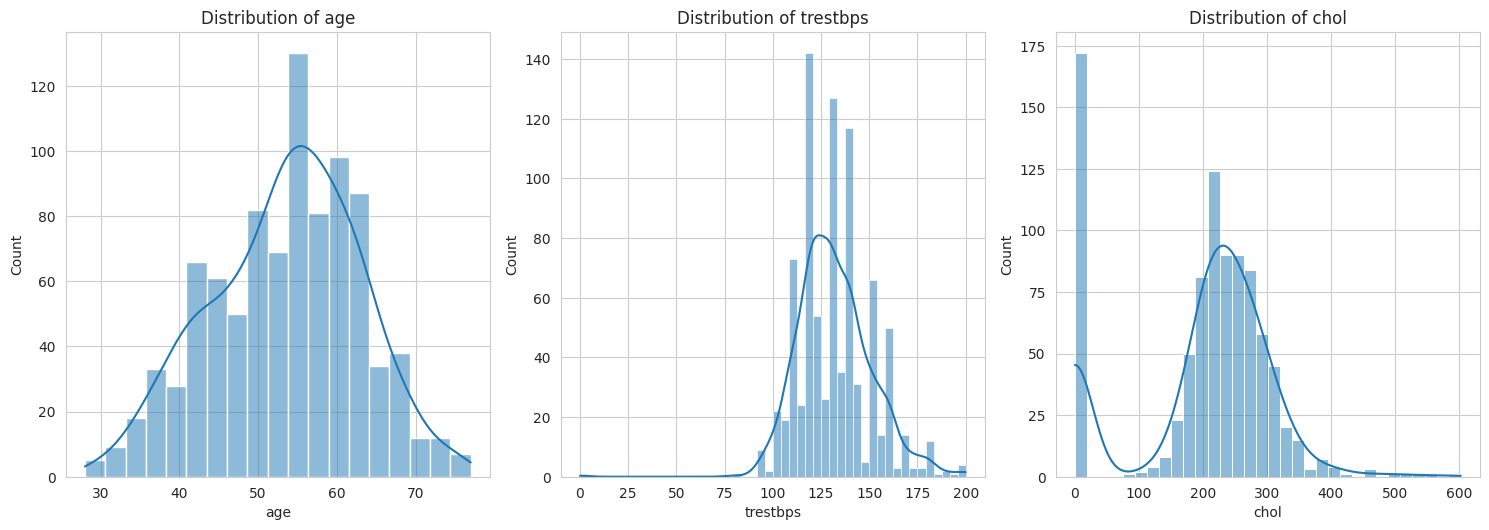

In [12]:
numerical_cols = ['age', 'trestbps', 'chol']

print("\nHistograms of Numerical Features:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True) # Drop NA for plotting
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

### **Insights**
* Age is almost normally distributed with mean, median, mode around ~54.
* Resting BP(trestbps) is left skewed due to lot of input values as 0 which can be called contaminated data.
* chol also has a lot of input values as 0 which is not good.  

## **Categorical Data**


Distribution of Categorical Features:


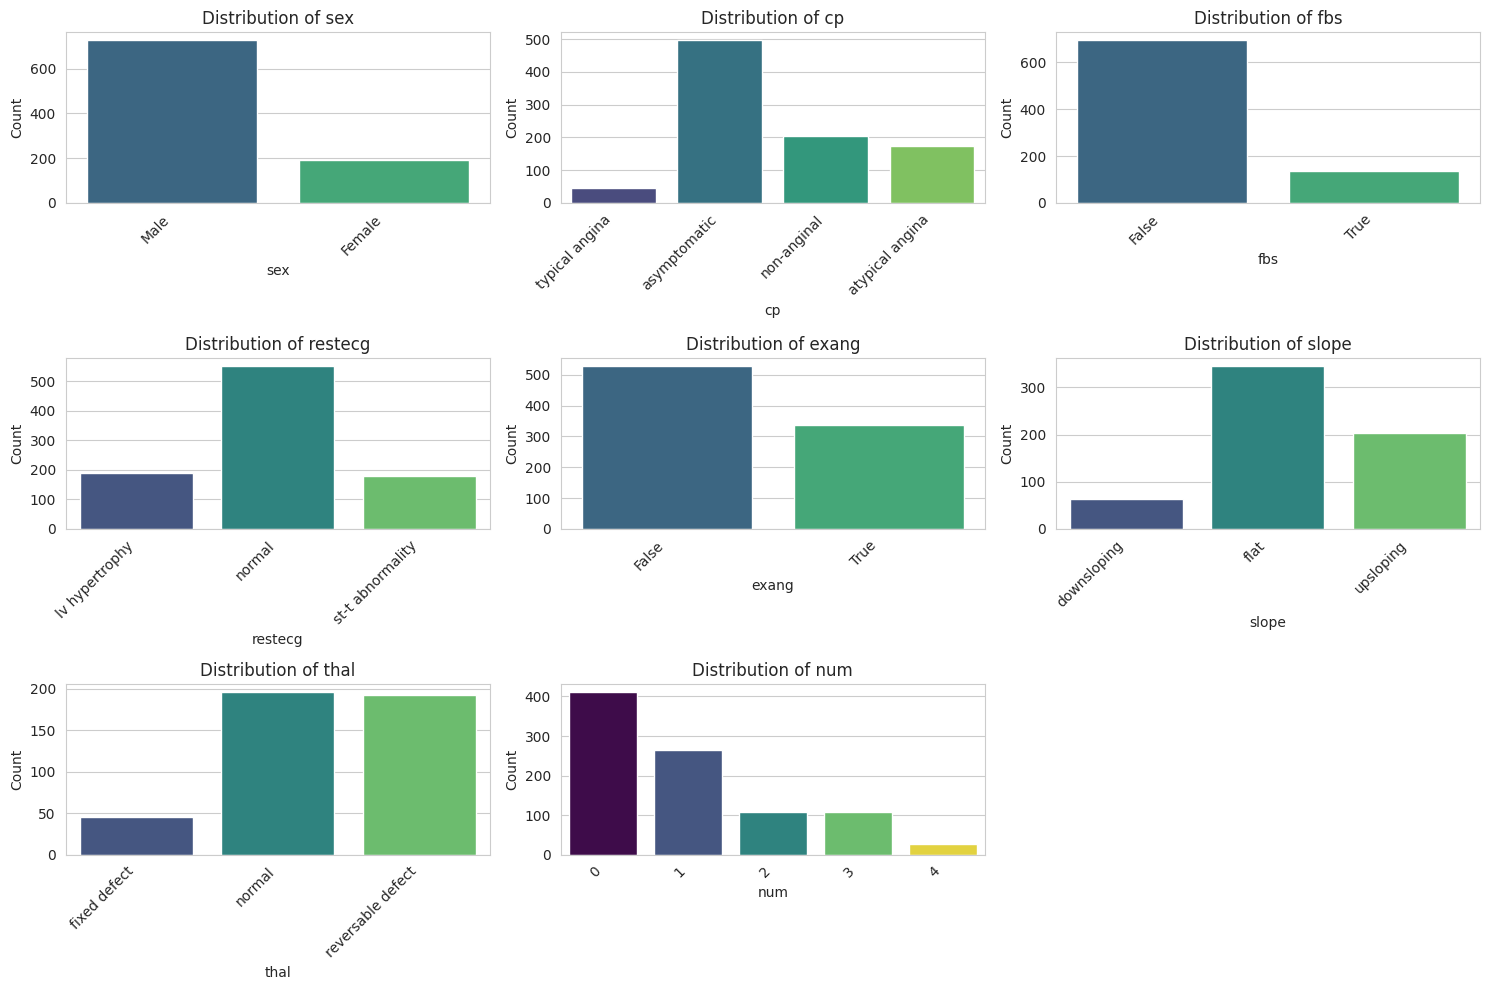

In [13]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num'] # Exclude 'id' and 'dataset'

print("\nDistribution of Categorical Features:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Insights**
* sex: There are significantly more males than females in the dataset.
* cp (Chest Pain Type): The 'asymptomatic' chest pain type is the most frequent, followed by 'non-anginal' and 'atypical angina', with 'typical angina' being the least frequent.
* fbs (Fasting Blood Sugar): The majority of individuals have fasting blood sugar less than or equal to 120 mg/dl (represented by 'False').
* num (Diagnosis of Heart Disease): This is the target variable and shows the distribution of heart disease severity. 'num' = 0 (no heart disease) is the most frequent category, but there is a considerable number of individuals with heart disease (num > 0), distributed across levels 1, 2, 3, and 4. There is an imbalance in the distribution of the target variable, with 'num' = 0 being the majority class.

## **Bivariate Analysis**

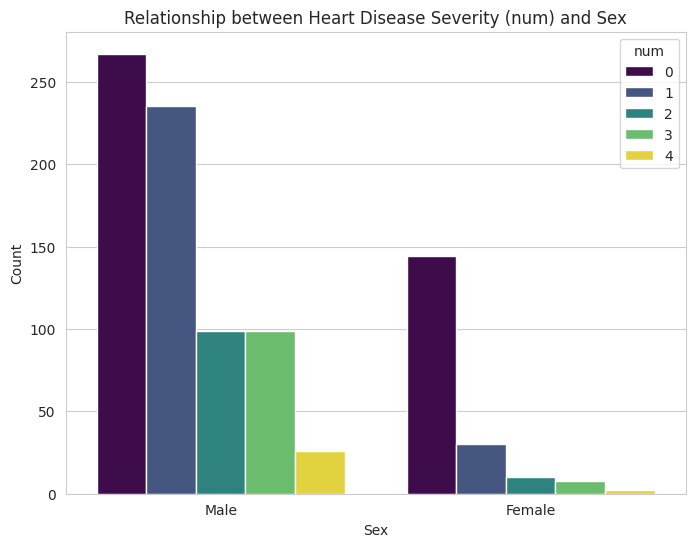

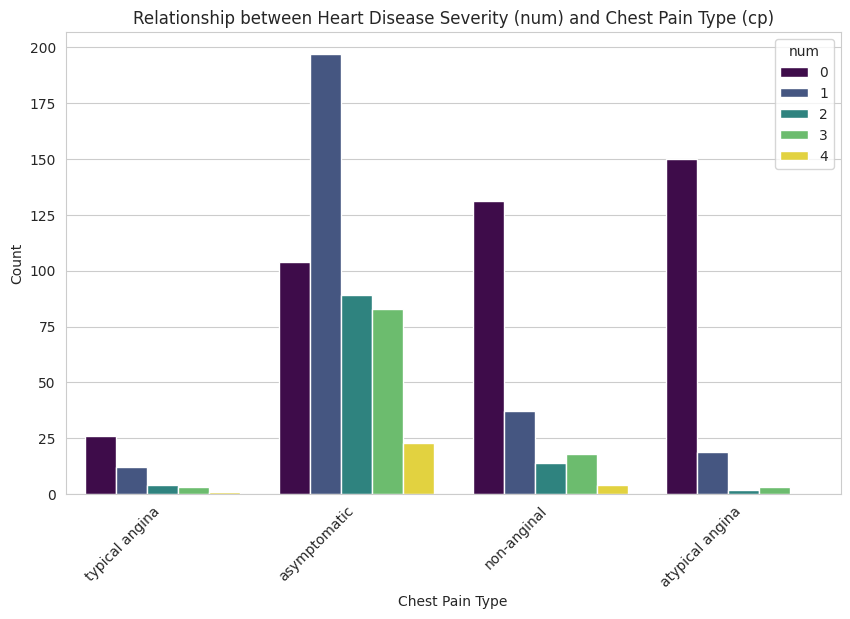

/tmp/ipython-input-3494737071.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num', y='thalch', palette='viridis') # Warning was here


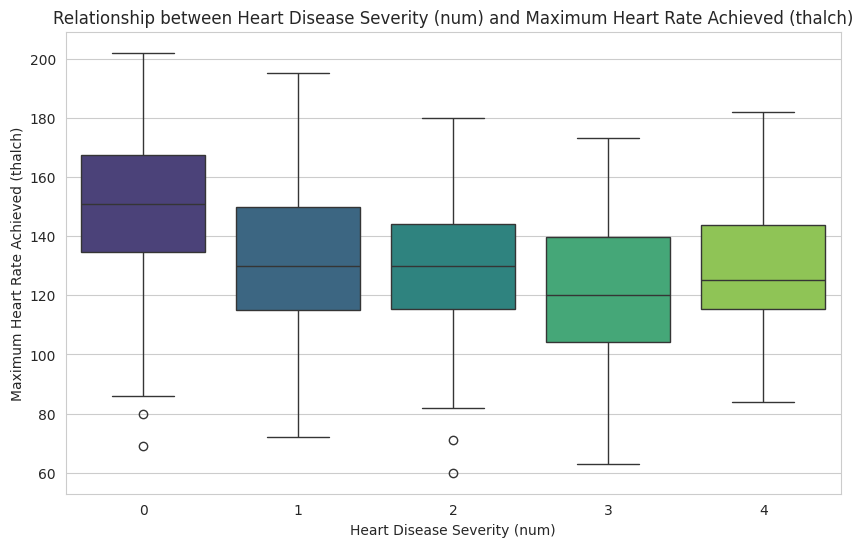

/tmp/ipython-input-3494737071.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num', y='age', palette='viridis') # Warning was here


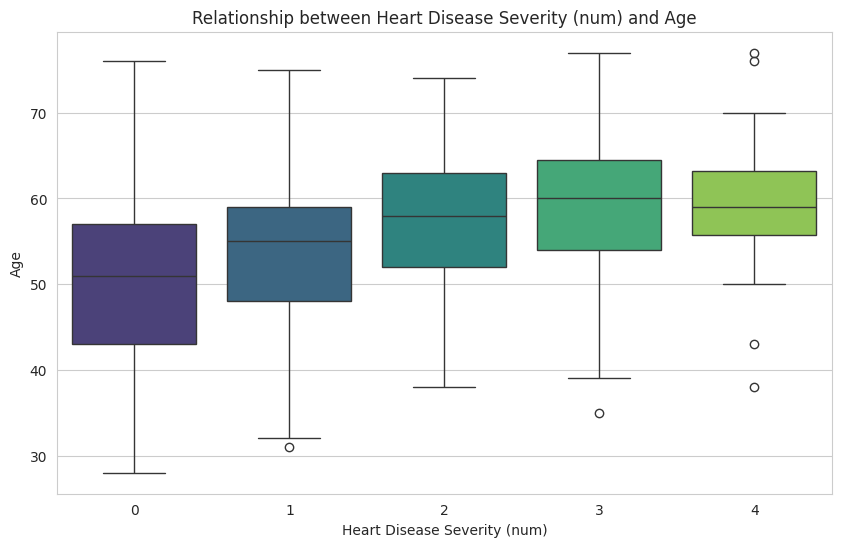

In [14]:
# Relationship between num and Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='num', palette='viridis')
plt.title('Relationship between Heart Disease Severity (num) and Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Relationship between num and CP (Chest Pain Type)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cp', hue='num', palette='viridis')
plt.title('Relationship between Heart Disease Severity (num) and Chest Pain Type (cp)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Relationship between num and Thalch (Maximum Heart Rate Achieved) - using boxplot as Thalch is numerical
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='num', y='thalch', palette='viridis') # Warning was here
plt.title('Relationship between Heart Disease Severity (num) and Maximum Heart Rate Achieved (thalch)')
plt.xlabel('Heart Disease Severity (num)')
plt.ylabel('Maximum Heart Rate Achieved (thalch)')
plt.show()

# Relationship between num and Age - using boxplot as Age is numerical
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='num', y='age', palette='viridis') # Warning was here
plt.title('Relationship between Heart Disease Severity (num) and Age')
plt.xlabel('Heart Disease Severity (num)')
plt.ylabel('Age')
plt.show()

### **Insights**
* More males than females are in the dataset; 'num'=0 is most frequent in both sexes, but a higher proportion of males have higher 'num' values.
* 'Asymptomatic' chest pain is most frequent in higher 'num' categories, while 'typical angina' is predominantly in 'num'=0.
* Lower 'num' values (less severe disease) tend to have higher maximum heart rates, suggesting an inverse relationship.
* Higher 'num' values (more severe disease) tend to be associated with older individuals, suggesting a positive relationship with age.

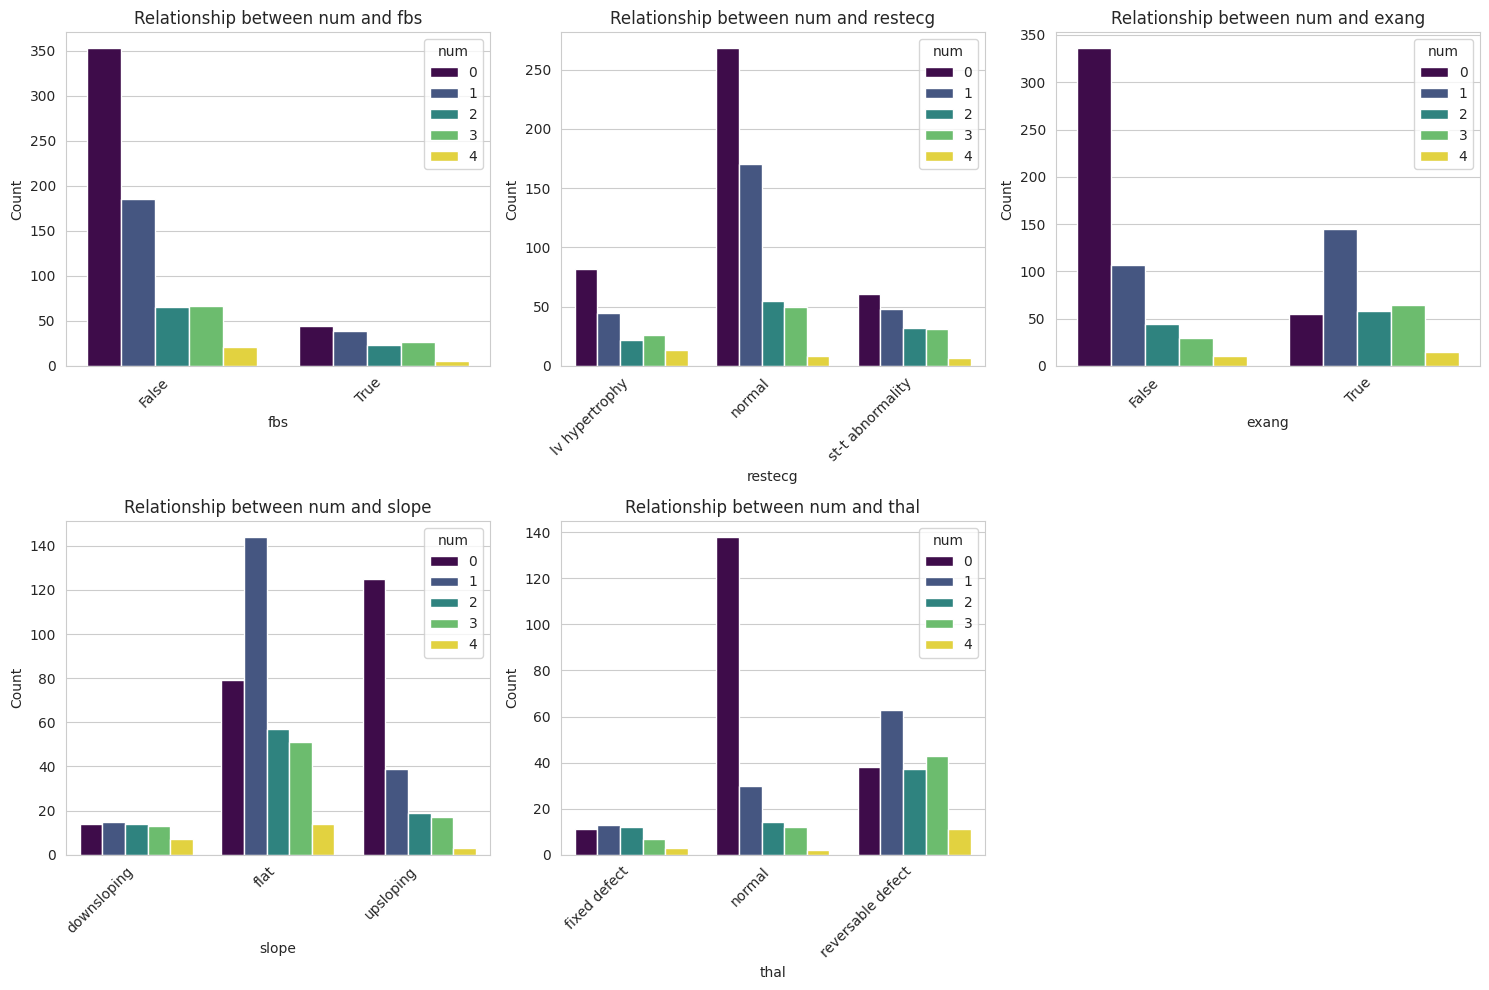

In [15]:
categorical_cols_to_plot = ['fbs', 'restecg', 'exang', 'slope', 'thal']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, hue='num', palette='viridis')
    plt.title(f'Relationship between num and {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Insights**
* 'fbs' = True shows a slightly higher proportion of 'num' > 0 compared to 'fbs' = False.
* 'lv hypertrophy' and 'st-t abnormality' restecg results show a higher proportion of 'num' > 0 compared to 'normal'.
* 'exang' = True is strongly associated with 'num' > 0, while 'exang' = False is strongly associated with 'num' = 0.
* 'flat' and 'downsloping' slopes are more associated with 'num' > 0, while 'upsloping' is more associated with 'num' = 0.
* 'fixed defect' and 'reversable defect' thal results are strongly associated with 'num' > 0 compared to 'normal'.


## **Multivariate Analysis**

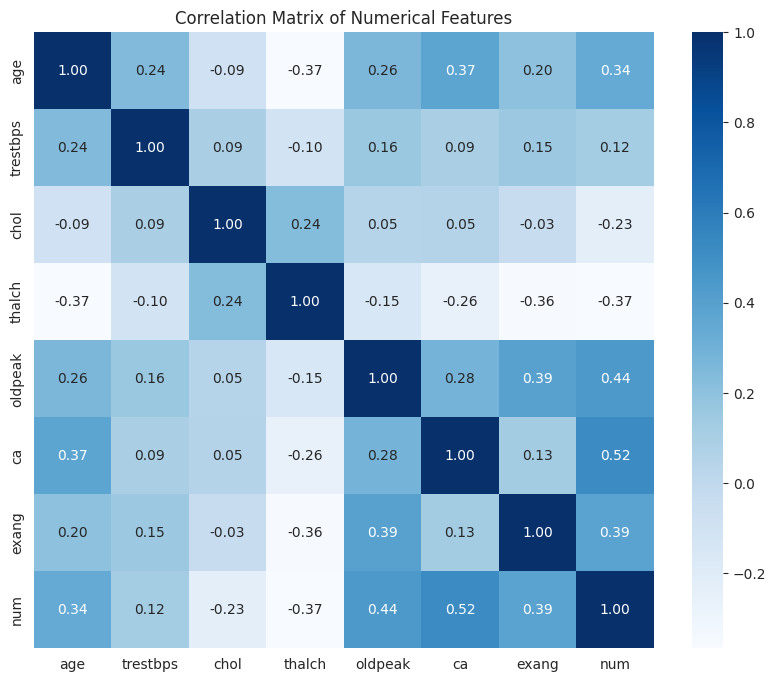

In [16]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'exang','num']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### **Insights**

* Heart disease severity (num) has a moderate positive correlation with age.
* Heart disease severity (num) has a weak positive correlation with resting blood pressure (trestbps).
* Heart disease severity (num) has a moderate negative correlation with cholesterol (chol).
* Heart disease severity (num) has a moderate negative correlation with maximum heart rate achieved (thalch).
* Heart disease severity (num) has a moderate positive correlation with oldpeak.
* Heart disease severity (num) has a strong positive correlation with the number of major vessels colored by fluoroscopy (ca).


### **Distribution of heart disease severity in males vs females**

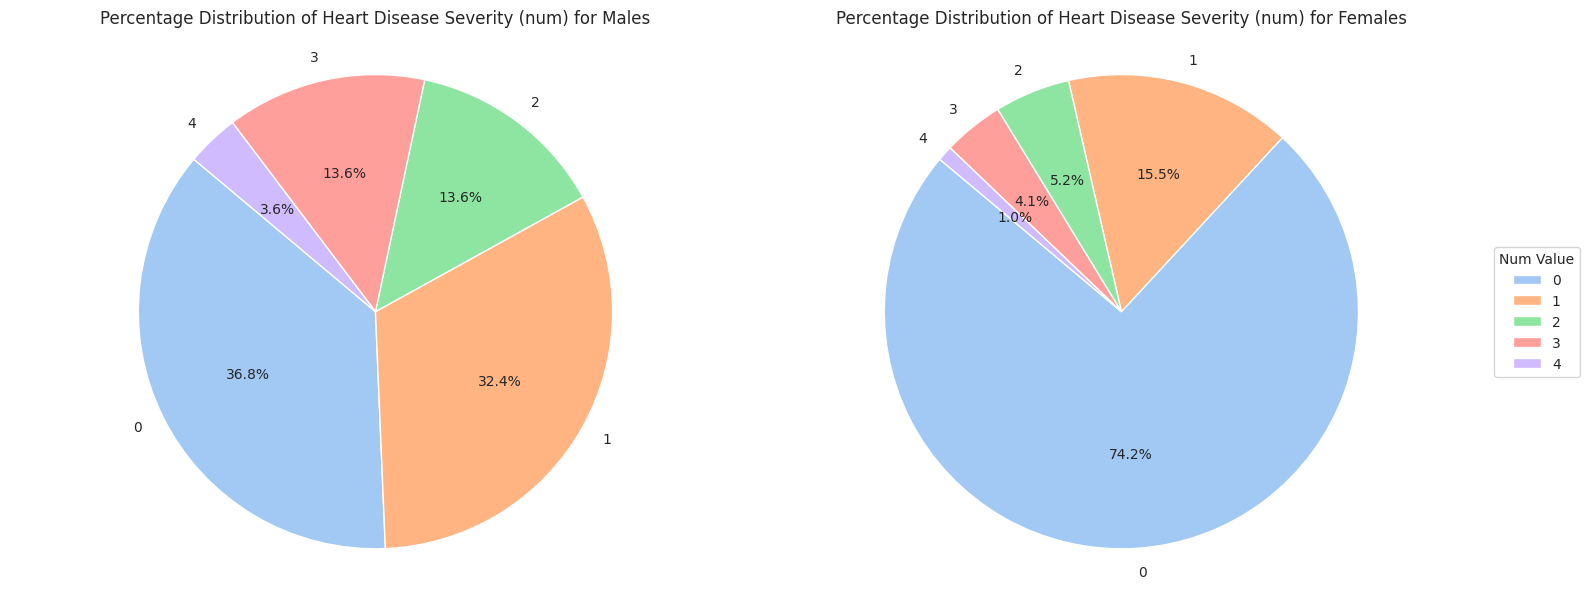

In [17]:
# Filter data for males and females
male_data = df[df['sex'] == 'Male']
female_data = df[df['sex'] == 'Female']

# Get the value counts for 'num' and calculate percentages for males and females
male_num_counts = male_data['num'].value_counts().sort_index()
male_num_percentages = (male_num_counts / male_num_counts.sum()) * 100

female_num_counts = female_data['num'].value_counts().sort_index()
female_num_percentages = (female_num_counts / female_num_counts.sum()) * 100

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the male pie chart on the first subplot
axes[0].pie(male_num_percentages, labels=male_num_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(male_num_percentages)))
axes[0].set_title('Percentage Distribution of Heart Disease Severity (num) for Males', pad=20)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# axes[0].legend(title='Num Value', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Plot the female pie chart on the second subplot
axes[1].pie(female_num_percentages, labels=female_num_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(female_num_percentages)))
axes[1].set_title('Percentage Distribution of Heart Disease Severity (num) for Females', pad=20)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].legend(title='Num Value', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

### **Insights**
* Males have much higher chance( around 64%) of getting heart disease than females(~26%).
* Heart disease of type 1 is most common in both the genders.

### **Proportion of Heart Disease by Age Group and Sex**

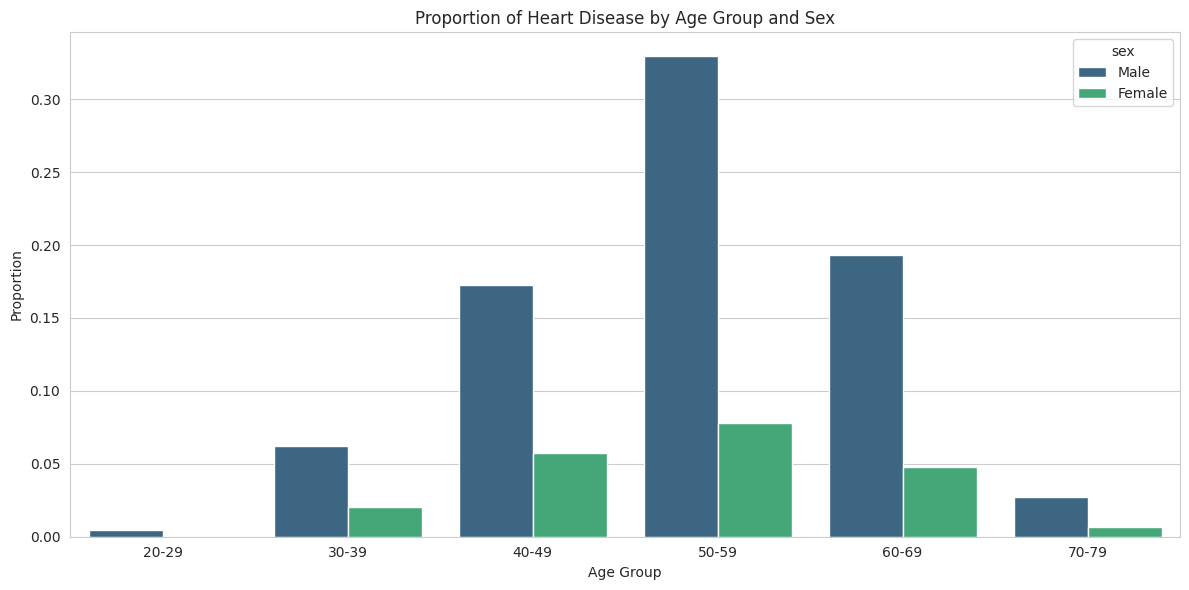

In [18]:
# Ensure 'age_group' and 'heart_disease' columns exist
if 'age_group' not in df.columns:
    age_bins = [20, 30, 40, 50, 60, 70, 80]
    age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

if 'heart_disease' not in df.columns:
    df['heart_disease'] = df['num'].apply(lambda x: 'No Disease' if x == 0 else 'Disease')


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age_group', hue='sex', palette='viridis', stat='proportion')
plt.title('Proportion of Heart Disease by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

### **Insights**
* In almost all age groups, the proportion of males with heart disease is higher than the proportion of females with heart disease.
* For both males and females, the proportion of individuals with heart disease generally increases with age.
* The age groups 50-59 and 60-69 show the highest proportions of individuals with heart disease for both males and females.
* In the youngest age group (20-29), the proportion of heart disease is very low for both sexes.


### **Proportion of Heart Disease by Sex**

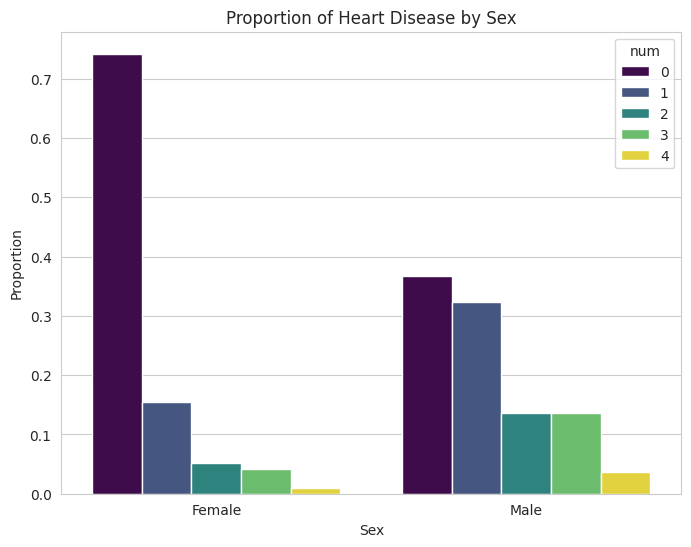

In [19]:
# Calculate the proportion of heart disease by sex
disease_proportion_by_sex = df.groupby('sex')['num'].value_counts(normalize=True).reset_index(name='proportion')

plt.figure(figsize=(8, 6))
sns.barplot(data=disease_proportion_by_sex, x='sex', y='proportion', hue='num', palette='viridis')
plt.title('Proportion of Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

### **Insights**
* For females, the majority have 'num' = 0 (no heart disease), with smaller proportions in higher severity categories.
* For males, the proportion of 'num' = 0 is lower than in females, and there are substantial proportions of males in 'num' categories 1, 2, and 3.
* A higher proportion of males in this dataset have heart disease (num > 0) compared to females.
* Heart disease severity levels 1, 2, and 3 are more prevalent proportionally in males than in females.
* The proportion of 'num' = 4 is low for both sexes, but slightly higher in males.

### **Proportion of Heart Disease Severity (num) by Age Group for Males and Females**

/tmp/ipython-input-1105843993.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_data = df.groupby(['age_group', 'sex'])['num'].value_counts(normalize=True).reset_index(name='proportion')


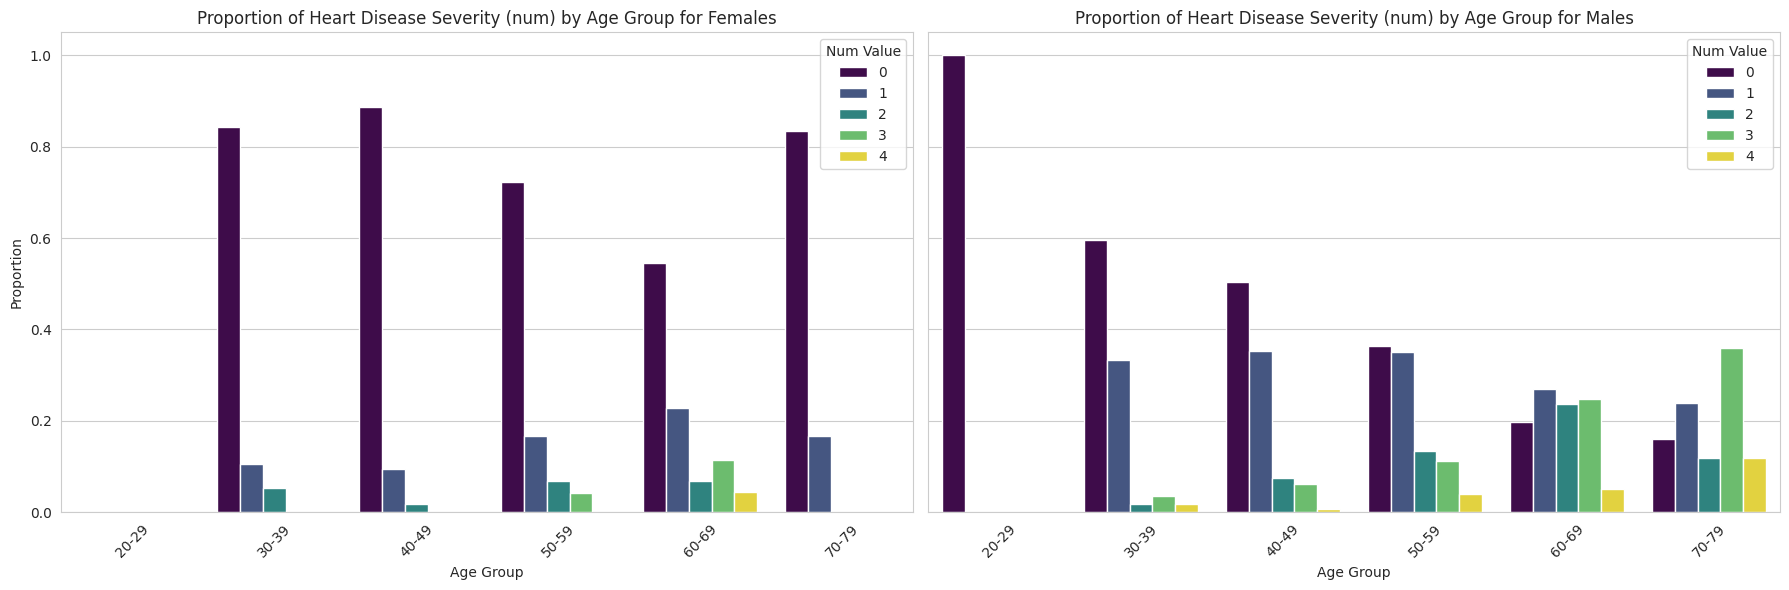

In [22]:
# Filter data for males and females (using the previously calculated proportion_data)

# Calculate the proportion of heart disease severity by age group and sex
proportion_data = df.groupby(['age_group', 'sex'])['num'].value_counts(normalize=True).reset_index(name='proportion')

male_proportion_data = proportion_data[proportion_data['sex'] == 'Male']
female_proportion_data = proportion_data[proportion_data['sex'] == 'Female']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True) # Share y-axis for easier comparison

# Plot the female data on the first subplot
sns.barplot(data=female_proportion_data, x='age_group', y='proportion', hue='num', palette='viridis', ax=axes[0])
axes[0].set_title('Proportion of Heart Disease Severity (num) by Age Group for Females')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Proportion')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Num Value')

# Plot the male data on the second subplot
sns.barplot(data=male_proportion_data, x='age_group', y='proportion', hue='num', palette='viridis', ax=axes[1])
axes[1].set_title('Proportion of Heart Disease Severity (num) by Age Group for Males')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Proportion') # Keep ylabel for clarity even with shared y-axis
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Num Value')


plt.tight_layout()
plt.show()

### **Insights**
* For females, 'num' = 0 is the dominant category across most age groups, with a slight increase in proportions of 'num' > 0 in older age groups (50+).
* For males, the proportion of 'num' > 0 is generally higher than in females across most age groups, and the proportions of higher 'num' values (1, 2, 3, 4) tend to increase with age, especially in the 50+ age range.
* Heart disease severity levels 1, 2, and 3 are more prevalent in older age groups for both sexes, but the proportions are noticeably higher in males in these age brackets.
* The youngest age groups (20-29, 30-39) show a higher proportion of 'num' = 0 for both sexes, with very low proportions of higher 'num' values.
* There's a clear visual difference in the distribution of 'num' values between males and females across all age groups, with males showing a higher tendency towards more severe heart disease.

# **Data Preprocessing**

In [23]:
#Code for Random Sampling

def random_sample_impute(df, column_name, random_state=None):
    np.random.seed(random_state)
    value_counts = df[column_name].value_counts(dropna=True, normalize=True)
    categories = value_counts.index
    probs = value_counts.values

    missing_mask = df[column_name].isnull()
    n_missing = missing_mask.sum()

    df.loc[missing_mask, column_name] = np.random.choice(categories, size=n_missing, p=probs)
    return df

### **Handling Missing Values in Numerical Columns**

In [24]:
# 1. Handle missing thalch values
# we use median because the thalch distribution may become skewed if we use mean

median_thalch = df['thalch'].median()
df['thalch'] = df['thalch'].fillna(median_thalch)

# 2. Handle missing chol values
# we use median because the chol distribution may become skewed if we use mean
median_chol = df['chol'].median()
df['chol'] = df['chol'].fillna(median_chol)

# 3. Handle missing trestbps values
# we use median because the trestbps distribution may become skewed if we use mean
median_trestbps = df['trestbps'].median()
df['trestbps'] = df['trestbps'].fillna(median_trestbps)

# 4. Handle missing oldpeak values
# we use median because the oldpeak distribution may become skewed if we use mean
median_oldpeak = df['oldpeak'].median()
df['oldpeak'] = df['oldpeak'].fillna(median_oldpeak)

df[['thalch', 'chol', 'trestbps', 'oldpeak']].isnull().sum()


,0
thalch,0
chol,0
trestbps,0
oldpeak,0


### **Handling Missing Values in Categorical Columns**

In [25]:
#Note: We'll handle 'ca' at the end because of following reasons:
# 1. It's a crucial column as it has a high correlation with num (~0.52)
# 2. It has a lot of missing values, we cannot take mode, median or mean as that can mislead the model.
# 3. Considering it's cruciality and missing counts, we'll do predictive imputation using random forest.

# Similar observations for 'thal' and 'slope'.


# fbs - random sampling
# exang - random sampling
# restecg - mode
# thal - predictive imputation
# slope - predictive imputation
# ca - predictive imputation

In [26]:
# 1. restecg - mode
mode_restecg = df['restecg'].mode()[0]
df['restecg'] = df['restecg'].fillna(mode_restecg)

# 2. fbs - random sampling
df = random_sample_impute(df, 'fbs', random_state=42)

# 3. exang - random sampling
df = random_sample_impute(df, 'exang', random_state=42)

df[['restecg', 'fbs', 'exang']].isnull().sum()

,0
restecg,0
fbs,0
exang,0


In [27]:
# Dropping dataset column
df.drop('dataset', axis=1, inplace=True)

In [28]:
#Before doing predictive imputation on 'ca', 'thal' and 'slope' columns, we have to do scaling and OHE

### **Scaling Numerical Columns**

In [29]:
# Define features (X) and target (y)
X = df.drop(['num', 'age_group', 'heart_disease'], axis=1)
y = df['num']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Scaling numerical data
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

### **One Hot Encoding**

In [31]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang']
encoder = OneHotEncoder(drop='first') # Removed sparse=False

# Fit and transform on the training data
encoded_features_train = encoder.fit_transform(X_train[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
X_train_encoded = pd.DataFrame(encoded_features_train.toarray(), columns=encoded_feature_names, index=X_train.index) # Convert to dense array and DataFrame

# Transform on the testing data
encoded_features_test = encoder.transform(X_test[categorical_features])
X_test_encoded = pd.DataFrame(encoded_features_test.toarray(), columns=encoded_feature_names, index=X_test.index) # Convert to dense array and DataFrame

# Drop original categorical columns and concatenate encoded columns
X_train = X_train.drop(categorical_features, axis=1)
X_test = X_test.drop(categorical_features, axis=1)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

display(X_train.head())
display(X_test.head())

,id,age,trestbps,chol,thalch,oldpeak,slope,ca,thal,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True
637,638,-0.033457,-0.627408,-1.799727,-1.700405,-0.803096,flat,NaN,normal,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
743,744,2.195486,-0.091274,-1.799727,0.084842,-0.329703,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
643,644,-0.033457,-0.091274,-1.799727,-0.113518,0.143690,flat,NaN,reversable defect,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
694,695,0.921804,-0.895475,-1.799727,-2.612865,-1.276489,flat,NaN,normal,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
913,914,0.921804,1.409901,-0.248354,0.005498,-0.803096,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


,id,age,trestbps,chol,thalch,oldpeak,slope,ca,thal,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True
529,530,-1.625559,-1.163542,0.235310,0.481564,0.143690,flat,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
683,684,0.815664,-0.359341,-1.799727,-1.303683,-0.803096,downsloping,NaN,reversable defect,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
919,920,0.921804,-0.627408,0.518207,-1.779749,-0.803096,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
146,147,0.391103,1.785195,0.837608,-0.549912,0.143690,flat,3.0,reversable defect,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
887,888,1.664785,-0.091274,0.673345,0.084842,-0.329703,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Predictive imputation for slope, thal, and ca

## Combine data

### Subtask:
Recombine the training and testing sets into a single DataFrame.

**Reasoning**:
Recombine the training and testing sets into a single DataFrame and Series for predictive imputation on the 'slope', 'thal', and 'ca' columns.

In [32]:
# Recombine scaled and encoded X_train and X_test
X_combined = pd.concat([X_train, X_test])

# Recombine y_train and y_test
y_combined = pd.concat([y_train, y_test])

# Align indices
X_combined = X_combined.sort_index()
y_combined = y_combined.sort_index()

display(X_combined.head())
display(y_combined.head())

,id,age,trestbps,chol,thalch,oldpeak,slope,ca,thal,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True
0,1,1.027944,0.712927,0.326567,0.481564,1.374513,downsloping,0.0,fixed defect,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2,1.452505,1.517128,0.810230,-1.184667,0.617084,flat,3.0,normal,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1.452505,-0.627408,0.290064,-0.351551,1.658549,flat,2.0,reversable defect,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,-1.731700,-0.091274,0.481704,1.949434,2.510657,downsloping,0.0,normal,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,-1.307139,-0.091274,0.061921,1.354352,0.522405,upsloping,0.0,normal,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


,num
0,0
1,2
2,1
3,0
4,0


## Predictive imputation for slope

### Subtask:
Apply predictive imputation for the 'slope' column on the combined DataFrame.

**Reasoning**:
Separate known and missing 'slope' values from the combined DataFrame, select appropriate features, train a Random Forest model, predict the missing values, and combine the data back.

In [33]:
# Separate known and missing slope from X_combined
X_known_slope = X_combined[X_combined['slope'].notnull()].copy()
X_missing_slope = X_combined[X_combined['slope'].isnull()].copy()

# Define features and target for imputation model
# Exclude the target variable 'slope', columns that will be imputed later ('ca', 'thal'), 'id', 'age_group', and 'heart_disease'
features_for_imputation = [col for col in X_known_slope.columns if col not in ['slope', 'id', 'ca', 'thal', 'age_group', 'heart_disease']]

X_impute = X_known_slope[features_for_imputation]
y_impute = X_known_slope['slope']

# Handle categorical features in X_impute for training the RF model
# Use one-hot encoding only for training the imputation model
# Identify categorical columns among features_for_imputation
categorical_cols_for_imputation = ['sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_True', 'restecg_normal', 'restecg_st-t abnormality', 'exang_True'] # Assuming these are already one-hot encoded

# Check if these columns exist in X_impute before selecting
categorical_cols_for_imputation = [col for col in categorical_cols_for_imputation if col in X_impute.columns]

X_impute_encoded = X_impute # Assuming relevant columns are already encoded

# Train-validation split for the imputation model
X_train_imp, X_val_imp, y_train_imp, y_val_imp = train_test_split(X_impute_encoded, y_impute, test_size=0.2, random_state=42, stratify=y_impute)

# Train Random Forest Imputer
rf_imputer = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf_imputer.fit(X_train_imp, y_train_imp)

# Select features for prediction on missing data
X_missing_pred = X_missing_slope[features_for_imputation]
X_missing_pred_encoded = X_missing_pred # Assuming relevant columns are already encoded

# Ensure columns match between training and missing data
# This step might not be necessary if the original X_combined has consistent columns
missing_cols = set(X_train_imp.columns) - set(X_missing_pred_encoded.columns)
for c in missing_cols:
    X_missing_pred_encoded[c] = 0
X_missing_pred_encoded = X_missing_pred_encoded[X_train_imp.columns]


X_missing_slope['slope'] = rf_imputer.predict(X_missing_pred_encoded)

# Combine back into full dataset
X_imputed_slope = pd.concat([X_known_slope, X_missing_slope]).sort_index()

# Verify no missing values in slope
print("Missing values in 'slope' after imputation:", X_imputed_slope['slope'].isnull().sum())

Missing values in 'slope' after imputation: 0


## Predictive imputation for thal

### Subtask:
Apply predictive imputation for the 'thal' column on the DataFrame after 'slope' has been imputed.

**Reasoning**:
Apply predictive imputation for the 'thal' column on the combined and slope-imputed DataFrame using a Random Forest model.

In [34]:
# Separate known and missing thal from X_imputed_slope
X_known_thal = X_imputed_slope[X_imputed_slope['thal'].notnull()].copy()
X_missing_thal = X_imputed_slope[X_imputed_slope['thal'].isnull()].copy()

# One-Hot Encode the 'slope' column for the thal imputation model
slope_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform on the known thal data
encoded_slope_known = slope_encoder.fit_transform(X_known_thal[['slope']])
encoded_slope_names = slope_encoder.get_feature_names_out(['slope'])
X_known_thal_encoded_slope = pd.DataFrame(encoded_slope_known, columns=encoded_slope_names, index=X_known_thal.index)

# Transform on the missing thal data
encoded_slope_missing = slope_encoder.transform(X_missing_thal[['slope']])
X_missing_thal_encoded_slope = pd.DataFrame(encoded_slope_missing, columns=encoded_slope_names, index=X_missing_thal.index)

# Drop the original 'slope' column and concatenate the encoded slope column
X_known_thal = X_known_thal.drop('slope', axis=1)
X_missing_thal = X_missing_thal.drop('slope', axis=1)

X_known_thal = pd.concat([X_known_thal, X_known_thal_encoded_slope], axis=1)
X_missing_thal = pd.concat([X_missing_thal, X_missing_thal_encoded_slope], axis=1)


# Define features and target for thal imputation model
features_for_thal_imputation = [col for col in X_known_thal.columns if col not in ['thal', 'id', 'ca', 'age_group', 'heart_disease']]
X_impute_thal = X_known_thal[features_for_thal_imputation]
y_impute_thal = X_known_thal['thal']

# Train-validation split for the thal imputation model
X_train_impute_thal, X_val_impute_thal, y_train_impute_thal, y_val_impute_thal = train_test_split(
    X_impute_thal, y_impute_thal, test_size=0.2, random_state=42, stratify=y_impute_thal
)

# Train Random Forest Imputer for thal
rf_imputer_thal = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf_imputer_thal.fit(X_train_impute_thal, y_train_impute_thal)

# Select features for prediction on missing thal data
X_missing_pred_thal = X_missing_thal[features_for_thal_imputation]

# Predict thal for missing rows
X_missing_thal['thal'] = rf_imputer_thal.predict(X_missing_pred_thal)

# Combine back into full dataset
X_imputed_thal = pd.concat([X_known_thal, X_missing_thal]).sort_index()

# Verify no missing values in thal
print("Missing values in 'thal' after imputation:", X_imputed_thal['thal'].isnull().sum())

Missing values in 'thal' after imputation: 0


## Predictive imputation for ca

### Subtask:
Apply predictive imputation for the 'ca' column on the DataFrame after 'slope' and 'thal' have been imputed.

**Reasoning**:
Separate known and missing 'ca' values, define features for imputation (including encoded 'slope' and 'thal'), split data, train a RandomForestClassifier, predict missing 'ca' values, and combine the data back.

In [35]:
# Separate known and missing ca from X_imputed_thal
X_known_ca = X_imputed_thal[X_imputed_thal['ca'].notnull()].copy()
X_missing_ca = X_imputed_thal[X_imputed_thal['ca'].isnull()].copy()

# Identify categorical columns among features for ca imputation (excluding 'ca' and 'id')
categorical_cols_for_ca_imputation = ['thal'] # 'slope' is already encoded

# One-Hot Encode categorical features for the ca imputation model
ca_imputation_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform categorical columns on the known ca data
if categorical_cols_for_ca_imputation:
    encoded_categorical_known_ca = ca_imputation_encoder.fit_transform(X_known_ca[categorical_cols_for_ca_imputation])
    encoded_categorical_names_ca = ca_imputation_encoder.get_feature_names_out(categorical_cols_for_ca_imputation)
    X_known_ca_encoded_categorical = pd.DataFrame(encoded_categorical_known_ca, columns=encoded_categorical_names_ca, index=X_known_ca.index)
    X_known_ca = X_known_ca.drop(categorical_cols_for_ca_imputation, axis=1)
    X_known_ca = pd.concat([X_known_ca, X_known_ca_encoded_categorical], axis=1)

# Transform categorical columns on the missing ca data
if categorical_cols_for_ca_imputation:
    encoded_categorical_missing_ca = ca_imputation_encoder.transform(X_missing_ca[categorical_cols_for_ca_imputation])
    X_missing_ca_encoded_categorical = pd.DataFrame(encoded_categorical_missing_ca, columns=encoded_categorical_names_ca, index=X_missing_ca.index)
    X_missing_ca = X_missing_ca.drop(categorical_cols_for_ca_imputation, axis=1)
    X_missing_ca = pd.concat([X_missing_ca, X_missing_ca_encoded_categorical], axis=1)


# Define features and target for ca imputation model (after encoding)
features_for_ca_imputation = [col for col in X_known_ca.columns if col not in ['ca', 'id', 'age_group', 'heart_disease']]
X_impute_ca = X_known_ca[features_for_ca_imputation]
y_impute_ca = X_known_ca['ca']

# Train-validation split for the ca imputation model
X_train_impute_ca, X_val_impute_ca, y_train_impute_ca, y_val_impute_ca = train_test_split(
    X_impute_ca, y_impute_ca, test_size=0.2, random_state=42, stratify=y_impute_ca
)

# Train Random Forest Imputer for ca
rf_imputer_ca = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf_imputer_ca.fit(X_train_impute_ca, y_train_impute_ca)

# Select features for prediction on missing ca data
X_missing_pred_ca = X_missing_ca[features_for_ca_imputation]

# Ensure columns match between training and missing data for prediction
missing_cols = set(X_train_impute_ca.columns) - set(X_missing_pred_ca.columns)
for c in missing_cols:
    X_missing_pred_ca[c] = 0
X_missing_pred_ca = X_missing_pred_ca[X_train_impute_ca.columns]


# Predict ca for missing rows
X_missing_ca['ca'] = rf_imputer_ca.predict(X_missing_pred_ca)

# Combine back into full dataset
X_imputed_ca = pd.concat([X_known_ca, X_missing_ca]).sort_index()

# Verify no missing values in ca
print("Missing values in 'ca' after imputation:", X_imputed_ca['ca'].isnull().sum())

Missing values in 'ca' after imputation: 0


## Re-split data

### Subtask:
Split the combined and imputed DataFrame back into training and testing sets.

**Reasoning**:
Split the imputed combined DataFrame back into training and testing sets, stratifying by the target variable.

In [36]:
# Split the imputed combined DataFrame back into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed_ca, y_combined, test_size=0.2, random_state=42, stratify=y_combined
)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
637,638,-0.033457,-0.627408,-1.799727,-1.700405,-0.803096,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
743,744,2.195486,-0.091274,-1.799727,0.084842,-0.329703,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
643,644,-0.033457,-0.091274,-1.799727,-0.113518,0.143690,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
694,695,0.921804,-0.895475,-1.799727,-2.612865,-1.276489,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
913,914,0.921804,1.409901,-0.248354,0.005498,-0.803096,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
529,530,-1.625559,-1.163542,0.235310,0.481564,0.143690,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
683,684,0.815664,-0.359341,-1.799727,-1.303683,-0.803096,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
919,920,0.921804,-0.627408,0.518207,-1.779749,-0.803096,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
146,147,0.391103,1.785195,0.837608,-0.549912,0.143690,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,888,1.664785,-0.091274,0.673345,0.084842,-0.329703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


,num
637,3
743,0
643,2
694,1
913,1


,num
529,1
683,3
919,1
146,4
887,0


## Reapply preprocessing

### Subtask:
Reapply scaling to numerical features and One-Hot Encoding to categorical features on the newly split training and testing sets.

**Reasoning**:
Reapply scaling to numerical features and One-Hot Encoding to categorical features on the newly split training and testing sets.

In [37]:
# Identify numerical and categorical features in the imputed data
# Exclude 'id' as it's not a feature for modeling
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'] # 'ca' is now numerical after imputation
# Categorical features are now the original categorical columns plus the one-hot encoded slope and thal columns
categorical_features = [col for col in X_train.columns if col not in numerical_features and col != 'id']


# Reapply Scaling to numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Reapply One-Hot Encoding to categorical features
# We need to be careful here as some categorical features might have already been encoded during imputation
# Let's identify the original categorical columns that were not used for imputation modeling and need encoding now for the main model
# Based on the original df.info(), original categorical features were: 'sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'
# 'dataset' was dropped. 'slope' and 'thal' were predictively imputed and encoded as part of that process.
# So we need to encode: 'sex', 'cp', 'fbs', 'restecg', 'exang'

original_categorical_for_final_ohe = ['sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_True', 'restecg_normal', 'restecg_st-t abnormality', 'exang_True', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable defect'] # These are already encoded from imputation steps

# Ensure all these columns exist in X_train and X_test
categorical_features_for_final_model = [col for col in original_categorical_for_final_ohe if col in X_train.columns]

# At this stage, the relevant categorical features are already one-hot encoded from the imputation steps.
# We just need to ensure the columns are in the correct format (e.g., float) and order.
# The imputation process already created the encoded columns and removed the originals.
# So, the X_train and X_test DataFrames already contain the scaled numerical features and the one-hot encoded categorical features.
# We just need to verify the column types and perhaps reorder columns for consistency if needed.

# Verify column types (should be mostly float now)
print("\nData types after re-preprocessing:")
print(X_train.dtypes)

# Display the first few rows of the preprocessed data
print("\nPreprocessed X_train:")
display(X_train.head())
print("\nPreprocessed X_test:")
display(X_test.head())


Data types after re-preprocessing:
id                            int64
age                         float64
trestbps                    float64
chol                        float64
thalch                      float64
oldpeak                     float64
ca                          float64
sex_Male                    float64
cp_atypical angina          float64
cp_non-anginal              float64
cp_typical angina           float64
fbs_True                    float64
restecg_normal              float64
restecg_st-t abnormality    float64
exang_True                  float64
slope_flat                  float64
slope_upsloping             float64
thal_normal                 float64
thal_reversable defect      float64
dtype: object

Preprocessed X_train:


,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
637,638,-0.033457,-0.627408,-1.799727,-1.700405,-0.803096,-0.543521,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
743,744,2.195486,-0.091274,-1.799727,0.084842,-0.329703,-0.543521,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
643,644,-0.033457,-0.091274,-1.799727,-0.113518,0.143690,0.826450,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
694,695,0.921804,-0.895475,-1.799727,-2.612865,-1.276489,-0.543521,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
913,914,0.921804,1.409901,-0.248354,0.005498,-0.803096,-0.543521,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0



Preprocessed X_test:


,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
529,530,-1.625559,-1.163542,0.235310,0.481564,0.143690,-0.543521,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
683,684,0.815664,-0.359341,-1.799727,-1.303683,-0.803096,0.826450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
919,920,0.921804,-0.627408,0.518207,-1.779749,-0.803096,0.826450,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
146,147,0.391103,1.785195,0.837608,-0.549912,0.143690,3.566394,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,888,1.664785,-0.091274,0.673345,0.084842,-0.329703,-0.543521,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# **Model Building and Training**

## 1. Train logistic regression


In [38]:
# Instantiate a Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the training data
logistic_regression_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

## Evaluate logistic regression

In [39]:
# 1. Use the trained logistic_regression_model to make predictions on the test set X_test.
y_pred_lr = logistic_regression_model.predict(X_test)

# 2. Calculate the accuracy score
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# 3. Generate the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# 4. Generate the classification report
class_report_lr = classification_report(y_test, y_pred_lr)

# 5. Calculate precision, recall, and F1-score
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# 6. Print or display all the calculated evaluation metrics
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_lr)
print("\nConfusion Matrix:\n", conf_matrix_lr)
print("\nClassification Report:\n", class_report_lr)
print("\nPrecision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)

Logistic Regression Model Evaluation:
Accuracy: 0.5869565217391305

Confusion Matrix:
 [[71  7  2  2  0]
 [14 30  4  5  0]
 [ 1 11  4  6  0]
 [ 2 15  1  3  0]
 [ 1  3  1  1  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        82
           1       0.45      0.57      0.50        53
           2       0.33      0.18      0.24        22
           3       0.18      0.14      0.16        21
           4       0.00      0.00      0.00         6

    accuracy                           0.59       184
   macro avg       0.35      0.35      0.35       184
weighted avg       0.55      0.59      0.56       184


Precision: 0.5464448647514252
Recall: 0.5869565217391305
F1-score: 0.5614593282011507


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

## 2. Random Forest


In [40]:
# Instantiate a Random Forest Classifier model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate random forest



In [41]:
# 1. Use the trained random_forest_model to make predictions on the test set X_test.
y_pred_rf = random_forest_model.predict(X_test)

# 2. Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# 3. Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# 4. Generate the classification report
class_report_rf = classification_report(y_test, y_pred_rf)

# 5. Calculate precision, recall, and F1-score
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# 6. Print or display all the calculated evaluation metrics
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)
print("\nPrecision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Random Forest Model Evaluation:
Accuracy: 0.6304347826086957

Confusion Matrix:
 [[73  6  2  1  0]
 [ 8 38  5  2  0]
 [ 3  8  1 10  0]
 [ 2 12  3  4  0]
 [ 0  3  1  2  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87        82
           1       0.57      0.72      0.63        53
           2       0.08      0.05      0.06        22
           3       0.21      0.19      0.20        21
           4       0.00      0.00      0.00         6

    accuracy                           0.63       184
   macro avg       0.34      0.37      0.35       184
weighted avg       0.58      0.63      0.60       184


Precision: 0.5756453185882624
Recall: 0.6304347826086957
F1-score: 0.5995798319327731


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

## 3. SVM



In [42]:
# Import the SVC class
from sklearn.svm import SVC

# Instantiate an SVC object
# Using default parameters, set random_state for reproducibility
svm_model = SVC(random_state=42)

# Fit the SVM model to the training data
svm_model.fit(X_train, y_train)

SVC(random_state=42)

## Evaluate svm

### Subtask:
Evaluate the performance of the SVM model using appropriate metrics.


**Reasoning**:
Evaluate the performance of the SVM model using appropriate metrics.



In [43]:
# 1. Use the trained svm_model to make predictions on the test set X_test.
y_pred_svm = svm_model.predict(X_test)

# 2. Calculate the accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# 3. Generate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# 4. Generate the classification report
class_report_svm = classification_report(y_test, y_pred_svm)

# 5. Calculate precision, recall, and F1-score
precision_svm = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# 6. Print or display all the calculated evaluation metrics
print("SVM Model Evaluation:")
print("Accuracy:", accuracy_svm)
print("\nConfusion Matrix:\n", conf_matrix_svm)
print("\nClassification Report:\n", class_report_svm)
print("\nPrecision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)

SVM Model Evaluation:
Accuracy: 0.6195652173913043

Confusion Matrix:
 [[71 11  0  0  0]
 [10 43  0  0  0]
 [ 7 15  0  0  0]
 [ 4 17  0  0  0]
 [ 2  4  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        82
           1       0.48      0.81      0.60        53
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.62       184
   macro avg       0.25      0.34      0.28       184
weighted avg       0.47      0.62      0.53       184


Precision: 0.474230393668414
Recall: 0.6195652173913043
F1-score: 0.5327892216479172


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 4. KNN



In [44]:
# Import the KNeighborsClassifier class
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNeighborsClassifier object
# Start with n_neighbors = 5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## Evaluate knn

### Subtask:
Evaluate the performance of the KNN model using appropriate metrics.


**Reasoning**:
Evaluate the performance of the KNN model using the specified metrics and display the results.



In [45]:
# 1. Use the trained knn_model to make predictions on the test set X_test.
y_pred_knn = knn_model.predict(X_test)

# 2. Calculate the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# 3. Generate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# 4. Generate the classification report
class_report_knn = classification_report(y_test, y_pred_knn)

# 5. Calculate precision, recall, and F1-score
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# 6. Print or display all the calculated evaluation metrics
print("KNN Model Evaluation:")
print("Accuracy:", accuracy_knn)
print("\nConfusion Matrix:\n", conf_matrix_knn)
print("\nClassification Report:\n", class_report_knn)
print("\nPrecision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)

KNN Model Evaluation:
Accuracy: 0.6141304347826086

Confusion Matrix:
 [[71  7  2  2  0]
 [ 8 36  5  4  0]
 [ 7 10  4  1  0]
 [ 7  9  3  2  0]
 [ 4  1  1  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79        82
           1       0.57      0.68      0.62        53
           2       0.27      0.18      0.22        22
           3       0.22      0.10      0.13        21
           4       0.00      0.00      0.00         6

    accuracy                           0.61       184
   macro avg       0.36      0.36      0.35       184
weighted avg       0.55      0.61      0.57       184


Precision: 0.548041663998634
Recall: 0.6141304347826086
F1-score: 0.5733890641875198


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipython-input-1328017921.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_values, palette='pastel')


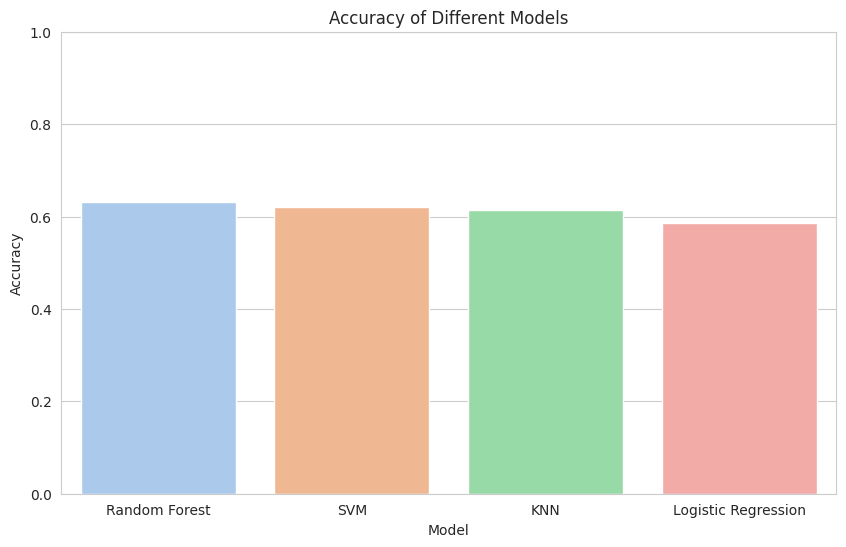

In [48]:
# Create a dictionary of model accuracies
model_accuracies = {
    'Logistic Regression': accuracy_lr,
    'Random Forest': accuracy_rf,
    'SVM': accuracy_svm,
    'KNN': accuracy_knn
}

# Sort the models by accuracy in descending order
sorted_models = sorted(model_accuracies.items(), key=lambda item: item[1], reverse=True)
model_names = [item[0] for item in sorted_models]
accuracy_values = [item[1] for item in sorted_models]

# Create a bar plot of model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_values, palette='pastel')
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.show()

### **Insights**
* **Random Forest** gives the best accuracy **~63%** as compared to other models.

## Summary:

### Data Analysis Key Findings

*   The Logistic Regression model achieved an accuracy of approximately 58.7% on the test set. It showed a weighted average precision of 54.9%, recall of 58.7%, and F1-score of 56.2%.
*   **The Random Forest model performed better with an accuracy of approximately 63.0%**. Its weighted average precision was 57.6%, recall was 63.0%, and F1-score was 60.0%. However, the model struggled with minority classes (2, 3, and 4), exhibiting low or zero precision, recall, and F1-scores for these classes.
*   The Support Vector Machine (SVM) model had an accuracy of approximately 62.0%. It showed weighted average precision of 47.4%, recall of 62.0%, and F1-score of 53.3%. Similar to Random Forest, the SVM model failed to predict any instances for classes 2, 3, and 4.
*   The K-Nearest Neighbors (KNN) model achieved an accuracy of approximately 61.4%. Its weighted average precision was 54.8%, recall was 61.4%, and F1-score was 57.3%.
